In [3]:
import queue_ as qu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rm


## Эксперименты с различными параметрами

#### В ходе экспериментов будем вычислять следующие метрики:

    1) Среднее время пребывания требования в системе;
    2) Вероятность ожидания (требование пришло, а очередь непустая);
    3) Среднее количество заявок в очереди;
    4) Эргодическое распределение.


In [81]:
def count_metrics(size_metrics, u_metrics, lam_metrics):
    queue = qu.Queue(seed=rm.randint(0, 10 ** 5), lam=lam_metrics, u=u_metrics, size=size_metrics)
    metrics = pd.DataFrame(columns=['Average time in the system',
                    'Probability of waiting',
                    'Average count of customers in the queue',
                    'Ergodic distribution'])

    metrics['Average time in the system'] = [i[2] - i[0] for i in queue.client_schedule]
    client_was_waiting = []
    truhnie = 0
    for i in range(len(queue.client_schedule)):
        if queue.client_schedule[i][1]-queue.client_schedule[i][0]:
            truhnie += 1
        client_was_waiting.append(truhnie/(i+1))
        
    metrics['Probability of waiting'] = client_was_waiting
    
    metrics['Average count of customers in the queue'] = [queue._a(i[0]) for i in queue.client_schedule]
    people_num = [queue._a(i[0]) for i in queue.client_schedule]
    metrics['Average count of customers in the queue'] = [sum(people_num[:i+1])/(i+1) for i in range(len(people_num))]
    
    ergodic = np.zeros(len(people_num))
    a = len(people_num)
    for i in range(len(people_num)):
        ergodic[people_num[i]] += 1/a
        
    metrics['Ergodic distribution'] = [ergodic[i] for i in range(len(people_num))]
    
    return metrics

In [82]:
print(count_metrics(size_metrics=5, u_metrics=2, lam_metrics= 5))

     Average time in the system  Probability of waiting  \
0                      0.411862                0.000000   
1                      0.617425                0.500000   
2                      0.337988                0.666667   
3                      0.324012                0.750000   
4                      0.262631                0.800000   
..                          ...                     ...   
237                    0.707226                0.903361   
238                    0.721143                0.903766   
239                    0.561043                0.904167   
240                    0.132516                0.904564   
241                    1.237571                0.900826   

     Average count of customers in the queue  Ergodic distribution  
0                                   0.000000              0.099174  
1                                   0.500000              0.198347  
2                                   1.000000              0.161157  
3              

# 1. Рассмотрим случай для <mi>&#x3BB;</mi> ≤ <mi>&#x3BC;</mi>*K

## <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> от 0 до 10, K = 5 

In [45]:
x = np.linspace(0.1, 10.0, 99)
y = []
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=2, lam_metrics = i)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])



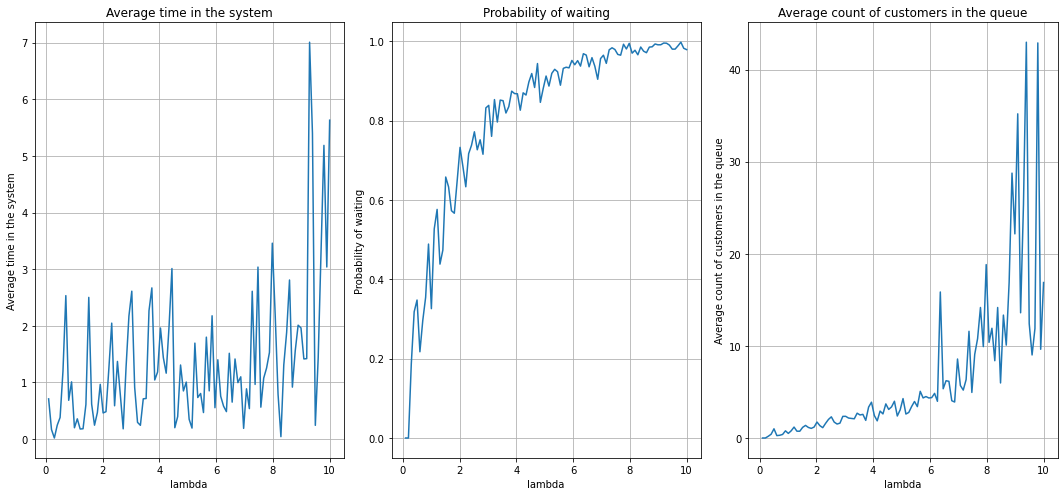

In [46]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('lambda')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## <mi>&#x3BC;</mi> от 5 до 10, <mi>&#x3BB;</mi> = 25, K = 5

In [85]:
y = []
x = np.linspace(5.0, 10.0, 99)
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=i, lam_metrics = 25)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])

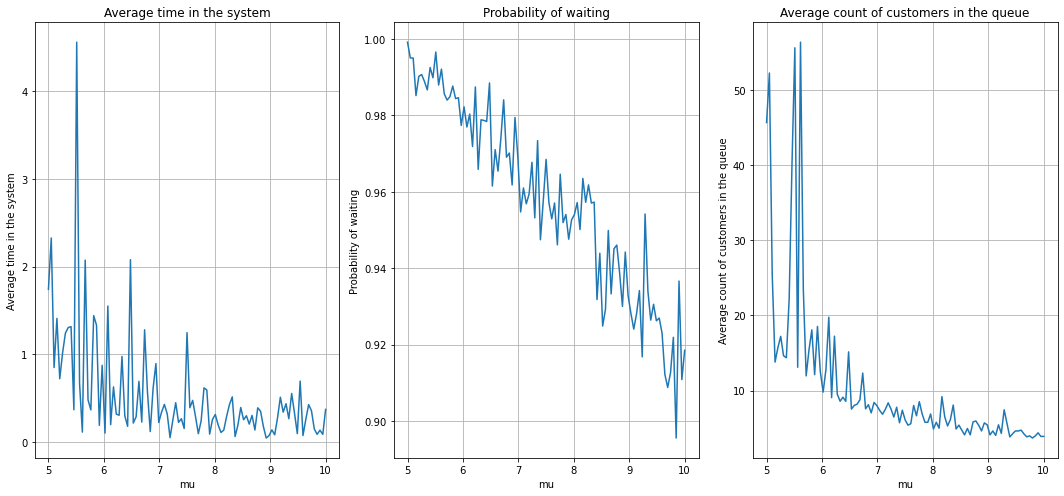

In [86]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('mu')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 50, K от 25 до 75

In [93]:
y = []
x = [i for i in range(25, 76)]
for i in x:
    metrics_now = count_metrics(size_metrics=i, u_metrics=2, lam_metrics = 50)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])

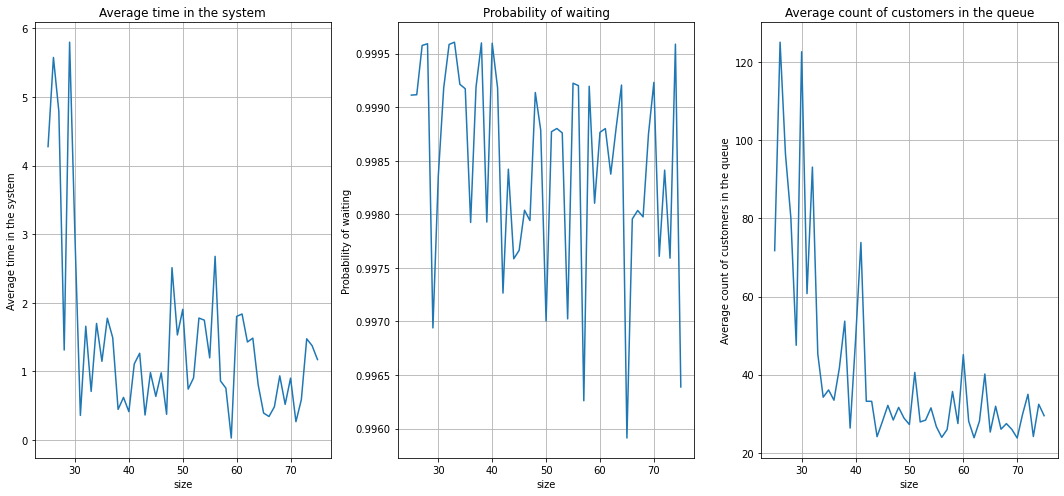

In [94]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('size')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## Посчитаем эргодическое распределение при <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 3, K = 5 (<mi>&#x3BB;</mi> значительно меньше) 

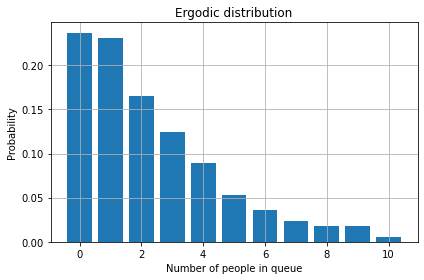

In [71]:
queue = qu.Queue(seed=rm.randint(0, 10 ** 5), lam=3, u=2, size=5)

people_num = [queue._a(i[0]) for i in queue.client_schedule]

ergodic = np.zeros(len(people_num))
a = len(people_num)
for i in range(len(people_num)):
    ergodic[people_num[i]] += 1/a

ergodic = ergodic[:max(people_num)+1]

plt.bar(range(len(ergodic)), ergodic)
plt.xlabel('Number of people in queue')
plt.ylabel('Probability')
plt.title('Ergodic distribution')
plt.tight_layout()
plt.grid()
plt.show()

## Посчитаем эргодическое распределение при <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 10, K = 5 

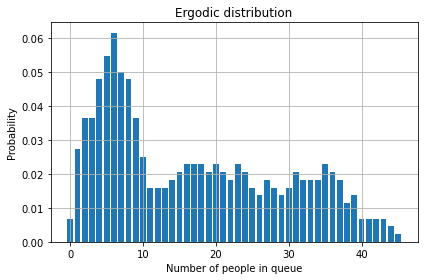

In [72]:
queue = qu.Queue(seed=rm.randint(0, 10 ** 5), lam=10, u=2, size=5)

people_num = [queue._a(i[0]) for i in queue.client_schedule]

ergodic = np.zeros(len(people_num))
a = len(people_num)
for i in range(len(people_num)):
    ergodic[people_num[i]] += 1/a
    
ergodic = ergodic[:max(people_num)+1]

plt.bar(range(len(ergodic)), ergodic)
plt.xlabel('Number of people in queue')
plt.ylabel('Probability')
plt.title('Ergodic distribution')
plt.tight_layout()
plt.grid()
plt.show()

# 2. Рассмотрим случай для <mi>&#x3BB;</mi> > <mi>&#x3BC;</mi>*K

## <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> от 10 до 20, K = 5

In [99]:
x = np.linspace(10.1, 20.0, 99)
y = []
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=2, lam_metrics = i)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])

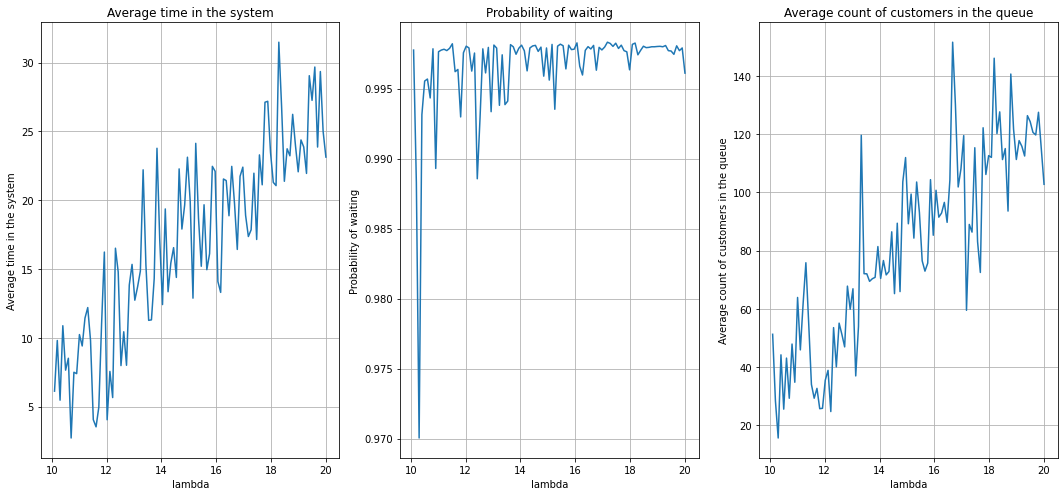

In [100]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('lambda')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## <mi>&#x3BC;</mi> от 1 до 5, <mi>&#x3BB;</mi> = 25, K = 5

In [51]:
y = []
x = np.linspace(1.0, 4.9, 99)
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=i, lam_metrics = 25)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])


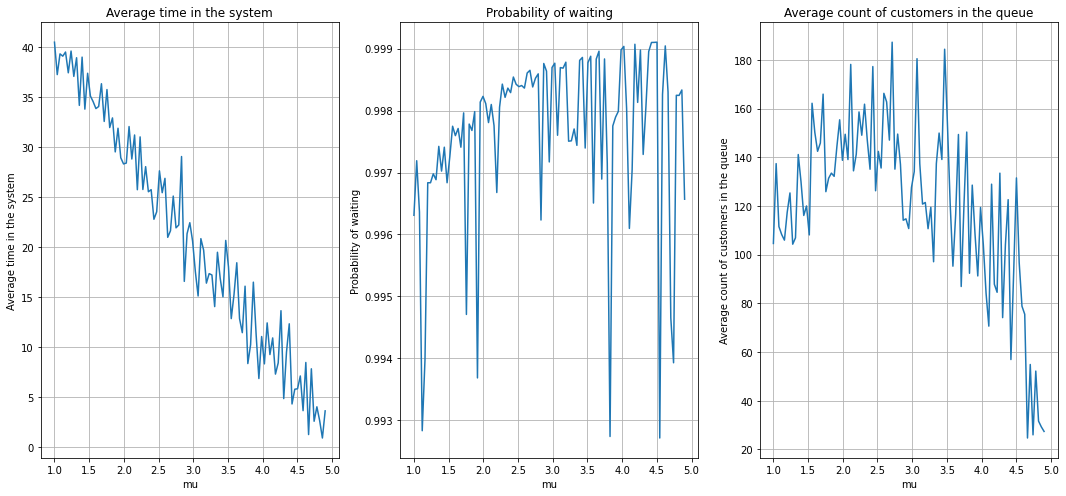

In [52]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('mu')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 150, K от 25 до 75

In [53]:
y = []
x = [i for i in range(25, 75)]
for i in x:
    metrics_now = count_metrics(size_metrics=i, u_metrics=2, lam_metrics = 150)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1]])

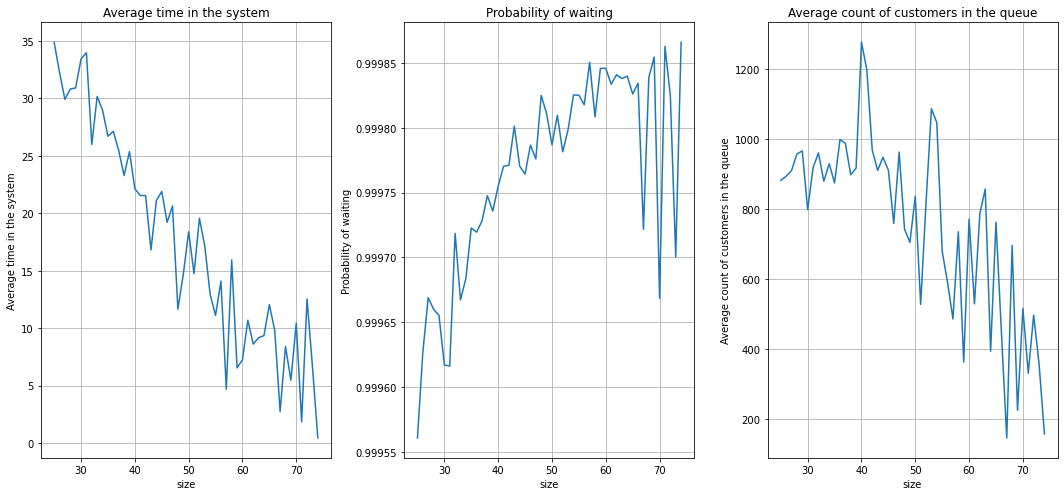

In [54]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('size')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

## Посчитаем эргодическое распределение при <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 20, K = 5 (<mi>&#x3BB;</mi> значительно больше)

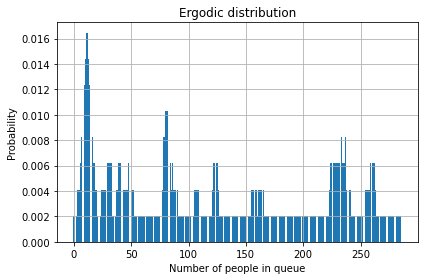

In [74]:
queue = qu.Queue(seed=rm.randint(0, 10 ** 5), lam=20, u=2, size=5)

people_num = [queue._a(i[0]) for i in queue.client_schedule]

ergodic = np.zeros(len(people_num))
a = len(people_num)
for i in range(len(people_num)):
    ergodic[people_num[i]] += 1/a
    
ergodic = ergodic[:max(people_num)+1]

plt.bar(range(len(ergodic)), ergodic)
plt.xlabel('Number of people in queue')
plt.ylabel('Probability')
plt.title('Ergodic distribution')
plt.tight_layout()
plt.grid()
plt.show()